In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#define the function
def f(t,x):
  return (1-2*t)*x

In [34]:
#runge-kutta 4 procedure
def rk4(f, t, init):
  nt = np.size(t)
  nv = np.size(init)
  x = np.zeros([nt, nv])
  x[0,:]=init
  h = t[1]-t[0]
  for i in range(nt-1):
    k1 = f(t[i],x[i,:])
    k2 = f(t[i]+0.5*h , x[i,:]+0.5*h*k1)
    k3 = f(t[i]+0.5*h , x[i,:]+0.5*h*k2)
    k4 = f(t[i]+h , x[i,:]+h*k3)
    x[i+1,:] = x[i,:] + (h/6)*(k1+2*k2+2*k3+k4)
  return x

In [35]:
# Simulation
t0=0
tf=2
t = np.linspace(t0, tf, 10)

In [36]:
init = 1   # initial condition x(0)=1
x_num = rk4(f, t, init)
x_ex = np.exp((1/4)-((1/2)-t)**2)
x_ex = np.reshape(x_ex, np.shape(x_num))

In [37]:
# checking size
np.shape(x_ex)
np.shape(x_num)

(10, 1)

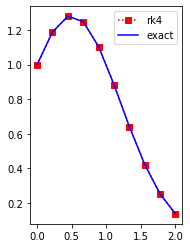

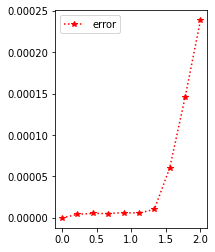

In [42]:
# plot the result
plt.figure(1)
plt.subplot(121)
plt.plot(t, x_num, 'sr:', label='rk4')
plt.plot(t, x_ex, '-b', label='exact')
plt.legend(loc='best')
plt.show()
plt.subplot(122)
plt.plot(t, np.abs(x_num-x_ex), '*r:', label='error')
plt.legend(loc='best')
plt.show()